Epoch 1/10 [Validation]: 100%|██████████| 47/47 [00:27<00:00,  1.71it/s]


Epoch [1/10]
Train Loss: 0.6778, Train Accuracy: 0.5597
Val Loss: 0.6084, Val Accuracy: 0.6985
Precision: 0.7022, Recall: 0.6965, F1-Score: 0.6993
Best model saved with recall: 0.6965


Epoch 2/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch [2/10]
Train Loss: 0.5628, Train Accuracy: 0.7100
Val Loss: 0.5139, Val Accuracy: 0.7402
Precision: 0.7262, Recall: 0.7767, F1-Score: 0.7506
Best model saved with recall: 0.7767


Epoch 3/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.77it/s]


Epoch [3/10]
Train Loss: 0.5088, Train Accuracy: 0.7505
Val Loss: 0.4862, Val Accuracy: 0.7699
Precision: 0.7781, Recall: 0.7594, F1-Score: 0.7686


Epoch 4/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch [4/10]
Train Loss: 0.4734, Train Accuracy: 0.7707
Val Loss: 0.4621, Val Accuracy: 0.7860
Precision: 0.8238, Recall: 0.7313, F1-Score: 0.7748


Epoch 5/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch [5/10]
Train Loss: 0.4426, Train Accuracy: 0.7884
Val Loss: 0.4587, Val Accuracy: 0.7873
Precision: 0.8871, Recall: 0.6618, F1-Score: 0.7580


Epoch 6/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch [6/10]
Train Loss: 0.4190, Train Accuracy: 0.8046
Val Loss: 0.4067, Val Accuracy: 0.7988
Precision: 0.8481, Recall: 0.7313, F1-Score: 0.7854


Epoch 7/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.74it/s]


Epoch [7/10]
Train Loss: 0.3926, Train Accuracy: 0.8190
Val Loss: 0.4282, Val Accuracy: 0.7974
Precision: 0.9086, Recall: 0.6644, F1-Score: 0.7676


Epoch 8/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.76it/s]


Epoch [8/10]
Train Loss: 0.3786, Train Accuracy: 0.8285
Val Loss: 0.3957, Val Accuracy: 0.8075
Precision: 0.8714, Recall: 0.7246, F1-Score: 0.7912


Epoch 9/10 [Validation]: 100%|██████████| 47/47 [00:27<00:00,  1.74it/s]


Epoch [9/10]
Train Loss: 0.3518, Train Accuracy: 0.8405
Val Loss: 0.3445, Val Accuracy: 0.8291
Precision: 0.8311, Recall: 0.8289, F1-Score: 0.8300
Best model saved with recall: 0.8289


Epoch 10/10 [Validation]: 100%|██████████| 47/47 [00:26<00:00,  1.75it/s]


Epoch [10/10]
Train Loss: 0.3399, Train Accuracy: 0.8490
Val Loss: 0.3316, Val Accuracy: 0.8452
Precision: 0.8866, Recall: 0.7941, F1-Score: 0.8378


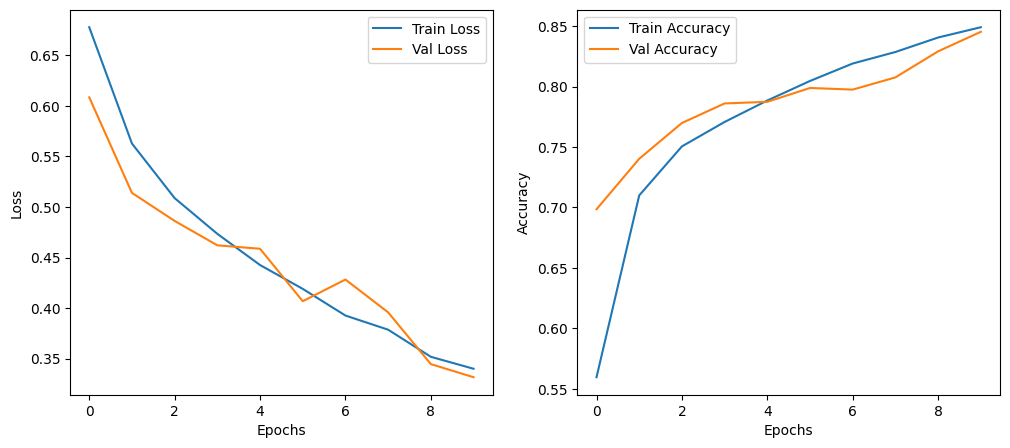

<ipython-input-3-a065548ab00c>:245: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_cnn_model.pth'))


<All keys matched successfully>

In [3]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# Custom dataset class for loading images
class ImageDataset(Dataset):
    def __init__(self, real_dir, fake_dir, transform=None):
        self.real_dir = real_dir
        self.fake_dir = fake_dir
        self.transform = transform

        # Get image paths for real and fake images
        self.real_images = os.listdir(real_dir)
        self.fake_images = os.listdir(fake_dir)

        # Create full paths for the images and assign labels
        self.image_paths = [os.path.join(real_dir, img) for img in self.real_images] + \
                           [os.path.join(fake_dir, img) for img in self.fake_images]

        # 0 for real, 1 for fake
        self.labels = [0] * len(self.real_images) + [1] * len(self.fake_images)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

from torchvision import transforms

# Enhanced Data Augmentation for Training
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resizes images to 128x128 for faster training
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

from sklearn.model_selection import train_test_split

# Defining paths to real and fake image directories
real_dir = 'final_cleaned_dataset/real'
fake_dir = 'final_cleaned_dataset/fake'

# Creating the full dataset
full_dataset = ImageDataset(real_dir, fake_dir, transform=train_transform)

# Getting dataset length
dataset_size = len(full_dataset)

# Splitting into 70% train and 30% for val+test
train_size = int(0.7 * dataset_size)
val_test_size = dataset_size - train_size

# Now spliting val+test into 15% val and 15% test
val_size = int(0.5 * val_test_size)
test_size = val_test_size - val_size

# Creating train, val, and test sets
train_dataset, val_test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_test_size])
val_dataset, test_dataset = torch.utils.data.random_split(val_test_dataset, [val_size, test_size])

# Creating DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Defining the CNN Model
class CNNModel(torch.nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = torch.nn.Linear(128 * 16 * 16, 512)
        self.fc2 = torch.nn.Linear(512, 128)
        self.fc3 = torch.nn.Linear(128, 2)  # Binary classification: real vs fake

        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))  # Conv Layer 1 with ReLU + Pooling
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))  # Conv Layer 2 with ReLU + Pooling
        x = self.pool(torch.nn.functional.relu(self.conv3(x)))  # Conv Layer 3 with ReLU + Pooling

        x = x.view(-1, 128 * 16 * 16)  # Flatten the output for fully connected layers

        x = self.dropout(torch.nn.functional.relu(self.fc1(x)))  # FC Layer 1 with ReLU + Dropout
        x = self.dropout(torch.nn.functional.relu(self.fc2(x)))  # FC Layer 2 with ReLU + Dropout
        x = self.fc3(x)  # Final output layer

        return x

# Initializing the model
model = CNNModel()

# Moving the model to the GPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def train_model(
    model,            # The PyTorch model to train
    train_loader,     # DataLoader for training data
    val_loader,       # DataLoader for validation data
    device,           # Device (cpu, mps, or cuda)
    num_epochs=10,    # Number of epochs to train for
    lr=1e-4,          # Learning rate
    model_save_path='best_cnn_model.pth'  # Path to save the best model
):
    # Define the optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()  # Cross-entropy loss for binary classification

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_recall = 0.0  # To track the model with the best recall

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        # Training loop with tqdm progress bar
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate average loss and accuracy for the epoch
        epoch_train_loss = running_loss / total_samples
        epoch_train_accuracy = correct_predictions / total_samples
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_predictions = 0
        val_total_samples = 0
        all_labels = []
        all_predictions = []
        with torch.no_grad():
            for val_images, val_labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):
                val_images, val_labels = val_images.to(device), val_labels.to(device)

                val_outputs = model(val_images)
                loss = loss_fn(val_outputs, val_labels)

                # Track validation loss and accuracy
                val_loss += loss.item() * val_images.size(0)
                _, val_predicted = torch.max(val_outputs, 1)
                val_correct_predictions += (val_predicted == val_labels).sum().item()
                val_total_samples += val_labels.size(0)

                # Collect labels and predictions for metrics calculation
                all_labels.extend(val_labels.cpu().numpy())
                all_predictions.extend(val_predicted.cpu().numpy())

        # Calculating average validation loss and accuracy
        epoch_val_loss = val_loss / val_total_samples
        epoch_val_accuracy = val_correct_predictions / val_total_samples
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        # Calculating precision, recall, f1, and support using sklearn
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='binary')

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.4f}')
        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

        # If this model has the best recall, saving it
        if recall > best_val_recall:
            best_val_recall = recall
            torch.save(model.state_dict(), model_save_path)
            print(f'Best model saved with recall: {recall:.4f}')

    # Plotting the loss and accuracy curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Training the model
train_model(model, train_loader, val_loader, device, num_epochs=10)

# Loading the best model for evaluation
model.load_state_dict(torch.load('best_cnn_model.pth'))


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()